# Assignment-5                                                                    
                                                                             Partner Name:Prasad Hegde
 
                                                                                Partner userid:

                               "All the work herein is solely mine"
                               
                               

## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in
Ω(dp) time.The lengths of D and P are d and p, respectively.

The maximum number of comparisons in brute force occur when the pattern matches completely except the last character. Hence, at every alignment len(P) comparisons will be made. So we have to choose a pattern such that all but last character matches.

Consider Text D='aaaaaaaaab' and pattern P=aaab' where d=len(D)=10, p=len(P)=4. Observe P in D, we have 3 matching characters ('aaa') in each d-p iterations. Hence, our brute-force algorithm do (d-p)*(p-1) comparisions. Acknowledge that p is never greater than d or p<sup>2</sup> == dp.

Therefore, for above pattern and the text the brute-force pattern-matching algorithm runs in Ω(dp)

### Problem 1.2: Python’s str class and pattern-matching
In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results.
The count method in Python’s str class takes a text D and a pattern P and returns the maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.

1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.
2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.
3. Similar to problem 1.2.1, modify the KMP program.

### Brute Force

In [46]:
# Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D. 
    # Brute force
def modified_find_brute(T, P):
    '''
    a count - keep count of non-overlapping pattern P in text T
    j pointer - where to start matching pattern next
    '''  
    n, m, count,j= len(T), len(P), 0,0
     # every starting position
    for i in range(n-m+1):
        k = 0
        # when text match the pattern, skip to the end of pattern
        if(j!=i):
            continue
    # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            count+=1
            j=i+k
        else:
            j=i+1
    return count


print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_brute('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_brute('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


### Boyer Moore
Initialise, a **count** variable tokeep count of non-overlapping pattern P in text T. When the pattern is matched we increase the count by one and shift i such that we jump the matched text and continue matching next.

In [48]:
# Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore program.
# Boyer - Moore
def modified_find_boyer_moore(T, P):
    n, m = len(T), len(P)
    count =  0
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                count+=1
                i=i+2*m-1
                k=m-1
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return count
print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_boyer_moore('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_boyer_moore('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


### KMP Algorithm
Initialize the **count** to zero. Increase the count whenever we find a pattern matching text, increase the pointer by one, and continue matching the pattern.

In [52]:
# Similar to problem 1.2.1, modify the KMP program.
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

# KMP
def modified_find_kmp(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                count+=1
                j+=1
                k=0
            else:
                j += 1
                k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return count

print('no. of non overlapping cdc '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cdc'))
print('no. of non overlapping cd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cd'))
print('no. of non overlapping cdcd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','cdcd'))
print('no. of non overlapping dcd '+'in'+' cdcdcdcdc =',modified_find_kmp('cdcdcdcdc','dcd'))
print('no. of non overlapping aaba '+'in'+' aabaabaaba =',modified_find_kmp('ABCABFC','ACC'))

no. of non overlapping cdc in cdcdcdcdc = 2
no. of non overlapping cd in cdcdcdcdc = 4
no. of non overlapping cdcd in cdcdcdcdc = 2
no. of non overlapping dcd in cdcdcdcdc = 2
no. of non overlapping aaba in aabaabaaba = 0


## Problem 2: Experimental Analysis of Pattern-Matching Algorithms
Perform an experimental analysis of pattern matching algorithms in terms of:
1. Number of character comparison: Perform an experimental analysis of the efficiency of
the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length
patterns.
2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP,
and Boyer-Moore pattern-matching algorithms. Run each algorithm against large text doc-
uments using varying-length patterns and report the relative running times.

In [154]:
import random
import time
import matplotlib.pyplot as plt

In [79]:
 # Brute force
def v1_find_brute (T , P ) :
    n , m = len ( T ) , len ( P )
    # every starting position
    comparison=0
    for i in range (n - m +1) :
        k = 0
        # conduct O ( k ) comparisons
        while k < m:
            comparison += 1
            if T [ i + k ] != P [ k ]:
                break
            k = k+1
        if k == m :
            return comparison  
    return comparison

In [80]:
# Boyer - Moore
def v1_find_boyer_moore (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    last = {}
    for k in range ( m ) :
        last [ P [ k ]] = k
    i = m -1
    k = m -1
    comparison=0
    while i < n :
        comparison=comparison+1
        # If match , decrease i , k
        if T [ i ] == P [ k ]:
            if k == 0:
#                 print("boyre moore found a match!")
                return comparison
            else :
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last . get ( T [ i ] , -1)
            i += m - min (k , j +1)
            k = m -1
    return comparison

In [82]:
import random

# Brute force
def comp_find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    char_comps = 0
    i = 0
    while i < (n-m+1):
        k=0
        while k < m:
            char_comps += 1
            if T[i + k] != P[k]:
                break
            k = k + 1
        if k==m:
            break
        else:
            i+=1
    return char_comps


# Boyer - Moore
def comp_find_boyer_moore (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    last = {}
    for k in range ( m ) :
        last [ P [ k ]] = k
    i = m -1
    k = m -1
    char_comps = 0
    while i < n :
        char_comps += 1
        if T [i] == P[k]:
            if k == 0:
                return char_comps
                i += 1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last.get (T[i],-1)
            i += m - min (k,j+1)
            k = m - 1
    return char_comps


# KMP failure function
def comp_compute_kmp_fail ( P ) :
    m = len ( P )
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        if P [ j ] == P [ k ]:
            fail [ j ] = k +1
            j += 1
            k += 1
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return fail

# KMP
def comp_find_kmp (T , P ) :
    n , m = len ( T ) , len ( P )
    if m == 0:
        return 0
    fail = comp_compute_kmp_fail ( P )
    # print ( fail )
    j = 0
    k = 0
    char_comps=0
    while j < n :
        char_comps += 1
        if T[j] == P[k]:
            j += 1
            k += 1
            if k == m :
                break
        elif k > 0:
            k = fail [k -1]
        else :
            j += 1
    return char_comps

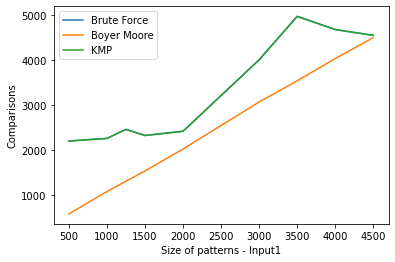

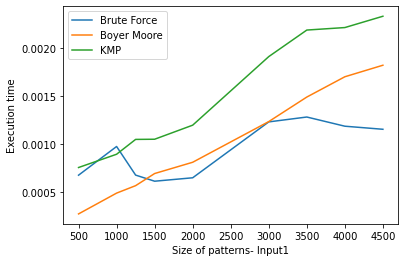

In [88]:
random.seed(50)
def generate_pattern_sizes(Source_text):
    m=len(Source_text)
    percentages = [0.1, 0.2, 0.25, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]
    n=[ int(x*len(Source_text)) for x in percentages]
    pattern_substring=[]
    for i in n:
        random_index= random.randint(0,m-i)
        pattern_substring.append(Source_text[random_index:random_index+i])
    return pattern_substring

def gen_random_text(size):
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm','n','o','p']
    input_char_list = [random.choice(alphabet) for i in range(size)]
    input_str = ''.join([str(elem) for elem in input_char_list])
    return input_str

def run_experiment_input1(text_string):
    final_time_brute=[]
    final_time_boyer=[]
    final_time_KMP=[]
    brute_k_comparisons=[]
    BM_k_comparison=[]
    KMP_k_comparison=[]
    pattern_substring=generate_pattern_sizes(text_string)
    for pattern in pattern_substring:
#         print("pattern=",pattern)
        pattern=pattern
        start_time=time.perf_counter()
        k1=v1_find_brute(text_string,pattern)
        final_time_brute.append(time.perf_counter()-start_time)
        brute_k_comparisons.append(k1)
        start_time1=time.perf_counter()
        k2=v1_find_boyer_moore(text_string,pattern)
        final_time_boyer.append(time.perf_counter()-start_time1)
        BM_k_comparison.append(k2)
        start_time2=time.perf_counter()
        k3=comp_find_kmp(text_string,pattern)
        final_time_KMP.append(time.perf_counter()-start_time2)
        KMP_k_comparison.append(k3)
    lengths = [len(x) for x in pattern_substring]
    plt.xlabel("Size of patterns - Input1",)
    plt.ylabel("Comparisons")
    plt.plot(lengths ,brute_k_comparisons, label = "Brute Force")
    plt.plot(lengths ,BM_k_comparison, label = "Boyer Moore")
    plt.plot(lengths ,KMP_k_comparison, label = "KMP ")
    plt.legend()
    plt.show()
    plt.clf()
    plt.xlabel("Size of patterns- Input1")
    plt.ylabel("Execution time")
    plt.plot(lengths ,final_time_brute, label = "Brute Force")
    plt.plot(lengths ,final_time_boyer, label = "Boyer Moore")
    plt.plot(lengths ,final_time_KMP, label = "KMP ")
    plt.legend()
    
input_str = gen_random_text(5000)
run_experiment_input1(input_str)


### Analysis of Character comparisons:

We need to calculate the number of comparisons made for checking if a pattern is matching or not matching.The above programs are modified to inculcate the counting of comparisons made. As told we need to compare three patttern matching algorithms.
* Brute Force
* Boyer-Moore Algorithm
* KMP algorithm

Each of these algorithms work the best for different types of text inputs.For example KMP works best when the pattern has repeating sub-patterns(For example: DNA sequences).

We have considered different types of inputs to show how the character comparisons happen.In order to generate patterns of different length a *generate_pattern_sizes()* function is used which takes src_text as input and 
generates substring as patterns of given length from a random index.

From the run experiment of input1 where the input is a 


## Problem 3: Matrix-chain Multiplication
The matrix-chain multiplication problem: Given a chain of < D 1 , D 2 , . . . , D n > of n matrices fully
parenthesize the product < D 1 ·D 2 · · · D n > in a way so that the number of scalar multiplications
is minimized. Each D i has a p i−1 × p i dimension and i = 1, 2, . . . , n.

### 1. The Brute-Force:
Implement a Python program to solve the matrix-chain multiplication problem by the brute force algorithm.

### 2. Bottom-up Dynamic Programming:
Implement a Python program to solve the matrix-chain multiplication problem using bottom-up dynamic programming approach.

### 3. Dynamic Programming with Memoization [Extra Credit]: 
Implement a Python program to solve the matrix-chain multiplication problem using dynamic programming with
memoization.

## Problem 4: Longest Common Sub-sequence (LCS) Problem
Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results.

*Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings.*

In [207]:
def longest_common_substring(Text1, Text2):
    lcs_matrix = [["" for x in range(len(Text2))] for x in range(len(Text1))]
    
    for i in range(len(Text1)):
        for j in range(len(Text2)):
            if Text1[i] == Text2[j]:
                if i == 0 or j == 0:
                    lcs_matrix[i][j] = Text1[i]
                else:
                    lcs_matrix[i][j] = lcs_matrix[i-1][j-1] + Text1[i]
            else:
                lcs_matrix[i][j] = max(lcs_matrix[i-1][j], lcs_matrix[i][j-1] , key=len)
    common_substring = lcs_matrix[-1][-1]
    return common_substring.upper()

In [203]:
text1="acaaatatggccgtcccaggacttcaataagaccaaaaacatatgagccgataaacgtacgtaatataaaacctcgaaacagggtatatggcacagtgga"
text2="tatgcgggcggccatgcgcctcccgttctgctacgaggtccatccggtttttcctgcacgctagtcagttcgcacccggaccttcacttagagctgtctc"
longest_common_substring(text1,text2)
acatggcctcccgttctgcacatatggccgacgtagtattaacctcacttaggcct

'ACATGGCCTCCCGTTCTGCACATATGGCCGACGTAGTATTAACCTCACTTAGGCCT'

In [205]:
text3="agtc"
text4="agtc"
longest_common_substring(text3,text4)

'AGTC'

### Output:
Given two DNA Sequence as input:
text1="acaaatatggccgtcccaggacttcaataagaccaaaaacatatgagccgataaacgtacgtaatataaaacctcgaaacagggtatatggcacagtgga"

text2="tatgcgggcggccatgcgcctcccgttctgctacgaggtccatccggtttttcctgcacgctagtcagttcgcacccggaccttcacttagagctgtctc"

longest_common_substring(text1,text2)

**Output:** ACATGGCCTCCCGTTCTGCACATATGGCCGACGTAGTATTAACCTCACTTAGGCCT

### Implementation:

Longest common subsequence uses tabulation method to compute the length of longest subsequence in the increasing order of indices from both the input string .

In the above program calculate the longest common substring length using a 2D list of length m+1 and n+1.This is because while computing the table we take the initial row and column as null to avoid underflow. 

#### Algorithm:

~~~
if S1[i]==S2[j]
    LCS[i][j]= LCS[i-1][j-1]+1
else
    LCS[i][j]=max(LCS[i-1][j],LCS[i][j-1])
~~~

After calculating the LCS value we backtrack the table bottom up to find the common subtrings and print them.

**Time Complexity:**
If m and n are the length of the two sequences respectively then time complexity will be O(mn).

**Space Complexity:**
If m and n are the size of the two sequences respectively then space required by this algorithm will be O(m+n).

